<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Ensemble Methods</h1>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from sklearn.datasets import make_moons

%config InlineBackend.figure_format = "retina"

In [18]:
import sys
sys.path.append("../files")
import utils

## Voting Methods

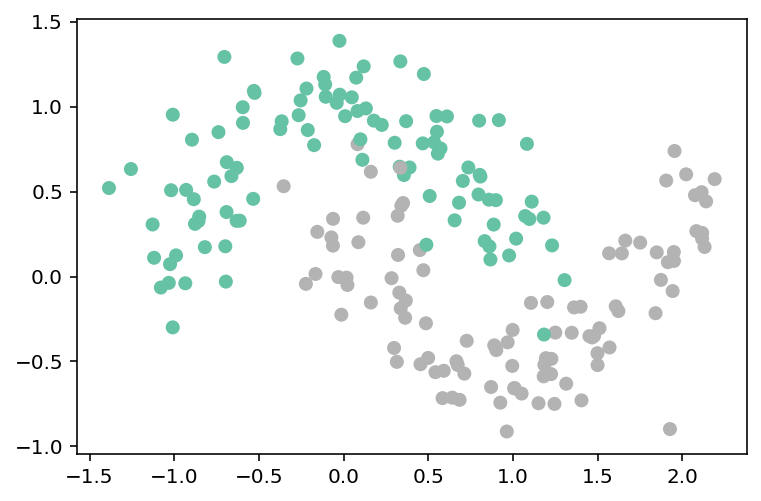

In [19]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression(C=1)
svm = SVC(C=1, kernel="linear", probability=True)
tree = DecisionTreeClassifier(max_depth=1)

clf = VotingClassifier([
    ("logreg", logreg),
    ("svm", svm),
    ("tree", tree)
], voting="soft")

In [22]:
logreg.fit(X, y)
svm.fit(X, y)
tree.fit(X, y)
clf.fit(X, y)

print("----Precision----")
models = logreg, svm, tree, clf
spacing = max([len(model.__class__.__name__) for model in models]) + 4
for model in models:
    model.fit(X, y)
    model_score = precision_score(y_test, model.predict(X_test))
    model_name = model.__class__.__name__
    len_model_name = len(model_name)
    print(f"{model_name}: {model_score:>{spacing - len_model_name}.2f}")

----Precision----
LogisticRegression:     0.84
SVC:                    0.84
DecisionTreeClassifier: 0.76
VotingClassifier:       0.90


/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Bagging

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
one_tree = DecisionTreeClassifier(random_state=2718)
lots_of_trees = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  bootstrap=True, max_samples=100, n_jobs=-1)

one_tree.fit(X, y)
lots_of_trees.fit(X, y);

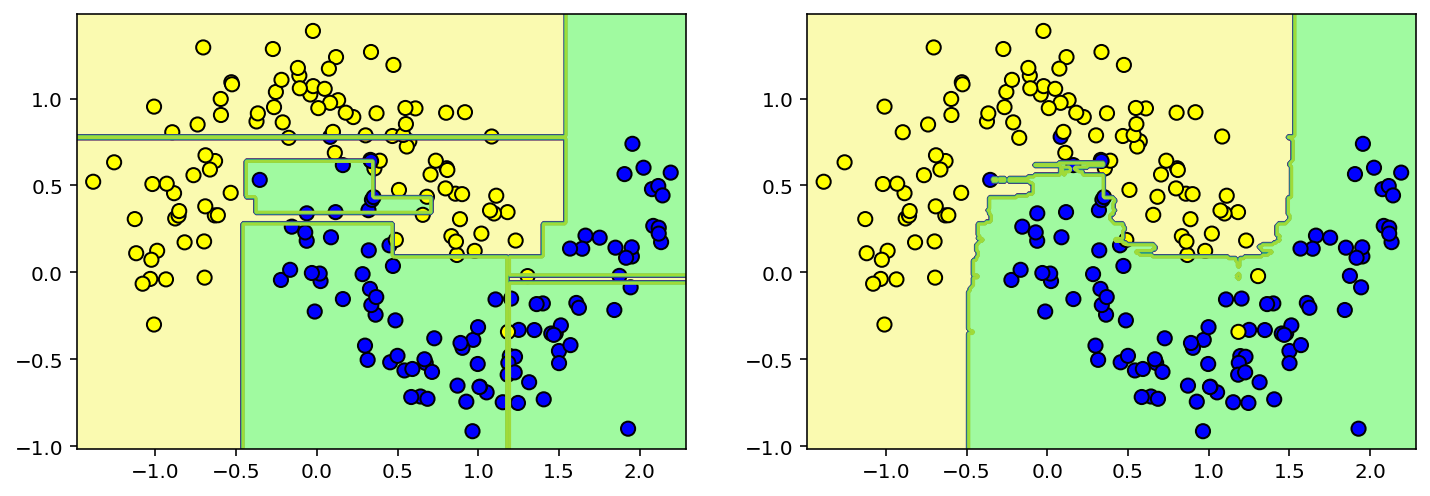

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, one_tree, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, lots_of_trees, ax=ax[1], contour=True)

In [26]:
# Evaluando el modelo con los datos no entrenados
lots_of_trees = BaggingClassifier(DecisionTreeClassifier(random_state=2718), n_estimators=500,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=314)
lots_of_trees.fit(X, y);
lots_of_trees.oob_score_

0.95

### Random Forests

Un _Bagging Classifier_ considerando árboles de decisión es conocido como un **Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, random_state=314, n_jobs=-1, oob_score=True)
rf.fit(X_test, y_test)
rf.oob_score_

0.85

In [28]:
# Predicción por medio de votos
rf.predict_proba(X[[3]])

array([[0.1825, 0.8175]])

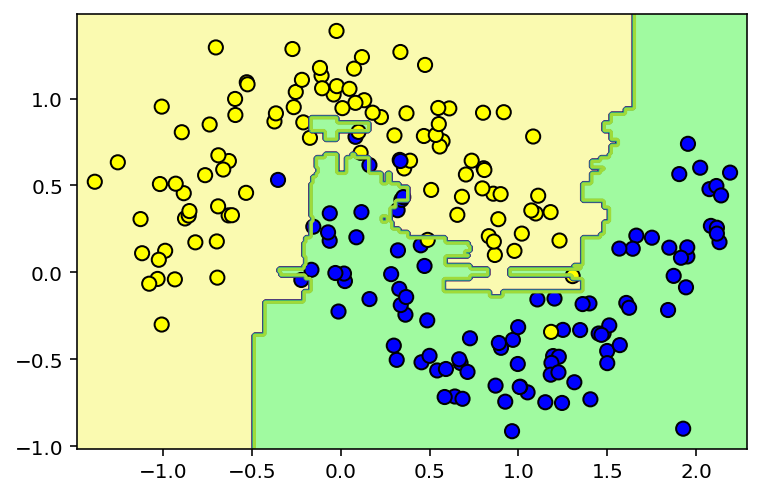

In [29]:
fig, ax = plt.subplots()
utils.plot_classf_model(X, y, rf, ax=ax, contour=True)

<h2 style="color:crimson">Ejercicio</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=30, include_bias=False)),
    ("lor",LogisticRegression(penalty = 'none', solver ='lbfgs', max_iter=1000))
])

bagging_logreg = BaggingClassifier(base_estimator=model, n_estimators=100, random_state=314)

In [32]:
model.fit(X,y)
bagging_logreg.fit(X,y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('lor',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                              

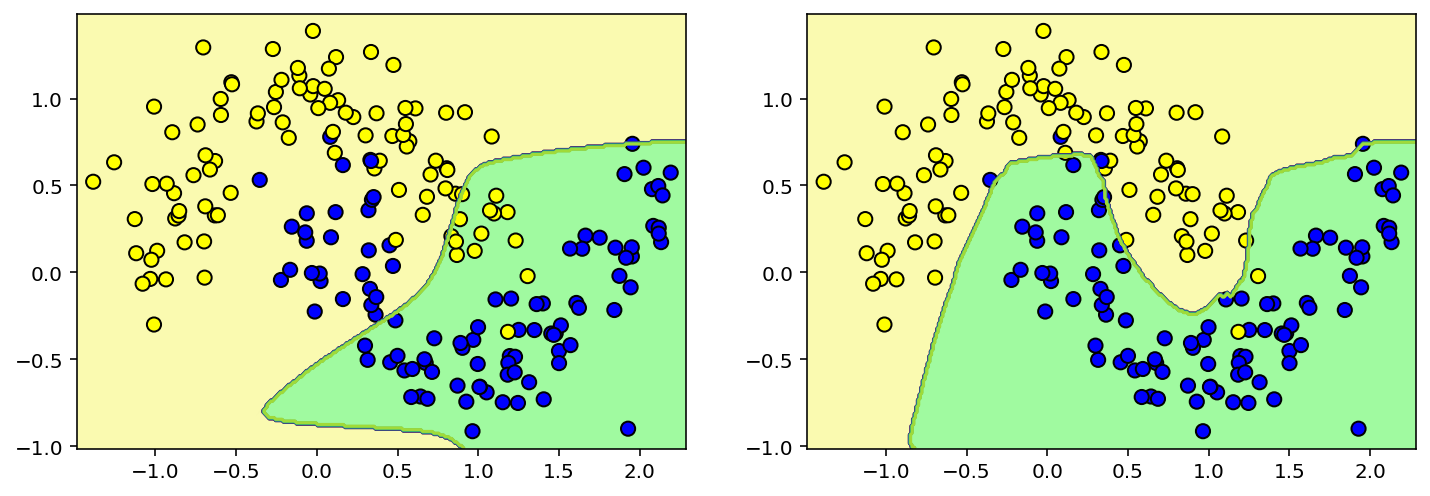

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

In [43]:
test = BaggingClassifier(base_estimator=model, n_estimators=100, random_state=314, oob_score=True)
test.fit(X,y)
test.oob_score_

0.94

In [49]:
#Considerando un f1_score (dentro de sklearn.metrics), calcula el f1-score sobre el test set (X_test, y_test) 
#considerando model y bagging_logreg. ¿Qué resultados arroja?
from sklearn.metrics import f1_score

yhat_model = model.predict(X_test)
yhat_bagging_logreg = bagging_logreg.predict(X_test)


In [53]:
f1_model = f1_score(y_test, yhat_model)
f1_bagg = f1_score(y_test, yhat_bagging_logreg)

print(f'f1_score de model es: {f1_model}')
print('')
print(f'f1_score de bagging_logreg es: {f1_bagg}')

f1_score de model es: 0.7647058823529412

f1_score de bagging_logreg es: 0.975609756097561
